In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images

!pip install python-barcode[images]
!pip install qrcode
!apt install libzbar0
!pip install pyzbar

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 621.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-got

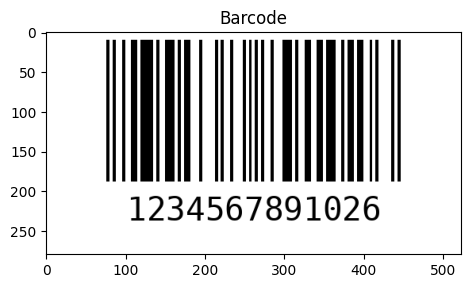

In [2]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open('barcode.png', 'wb') as f:
    EAN13('123456789102', writer=ImageWriter()).write(f)

barcode = cv2.imread("barcode.png")
imshow("Barcode", barcode)



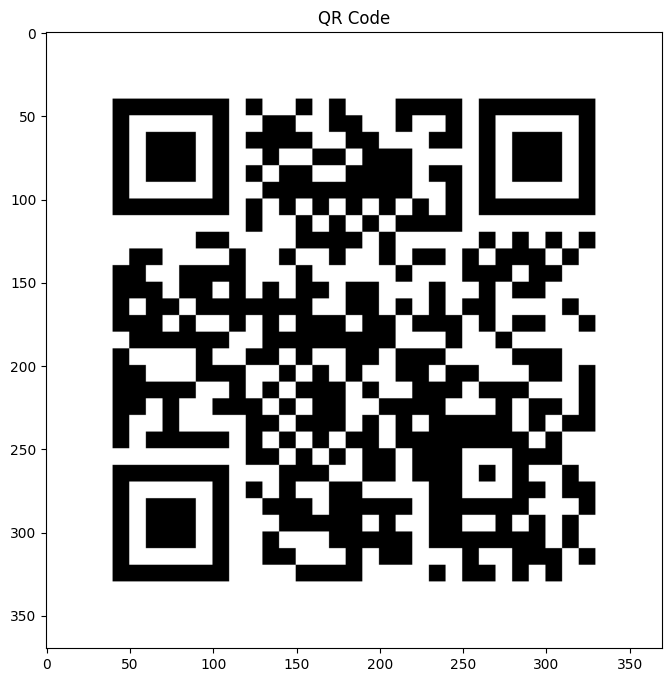

In [3]:
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data("https://wwww.opencv.org")
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")

qrcode = cv2.imread("qrcode.png")
imshow("QR Code", qrcode, size = 8)

In [14]:
from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('/content/wiki.png')
result = decode(img)
for i in result:
    print(i.data.decode("utf-8"))

Ver1


In [15]:
!wget https://i.stack.imgur.com/1DwED.jpg


--2024-01-15 07:17:10--  https://i.stack.imgur.com/1DwED.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.20.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.20.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439449 (429K) [image/jpeg]
Saving to: ‘1DwED.jpg.1’

1DwED.jpg.1         100%[===================>] 429.15K  --.-KB/s    in 0.02s   

2024-01-15 07:17:10 (18.2 MB/s) - ‘1DwED.jpg.1’ saved [439449/439449]



[Point(x=36, y=36), Point(x=36, y=183), Point(x=183, y=183), Point(x=183, y=36)]
QR Code revealed: Ver1 (QRCODE)


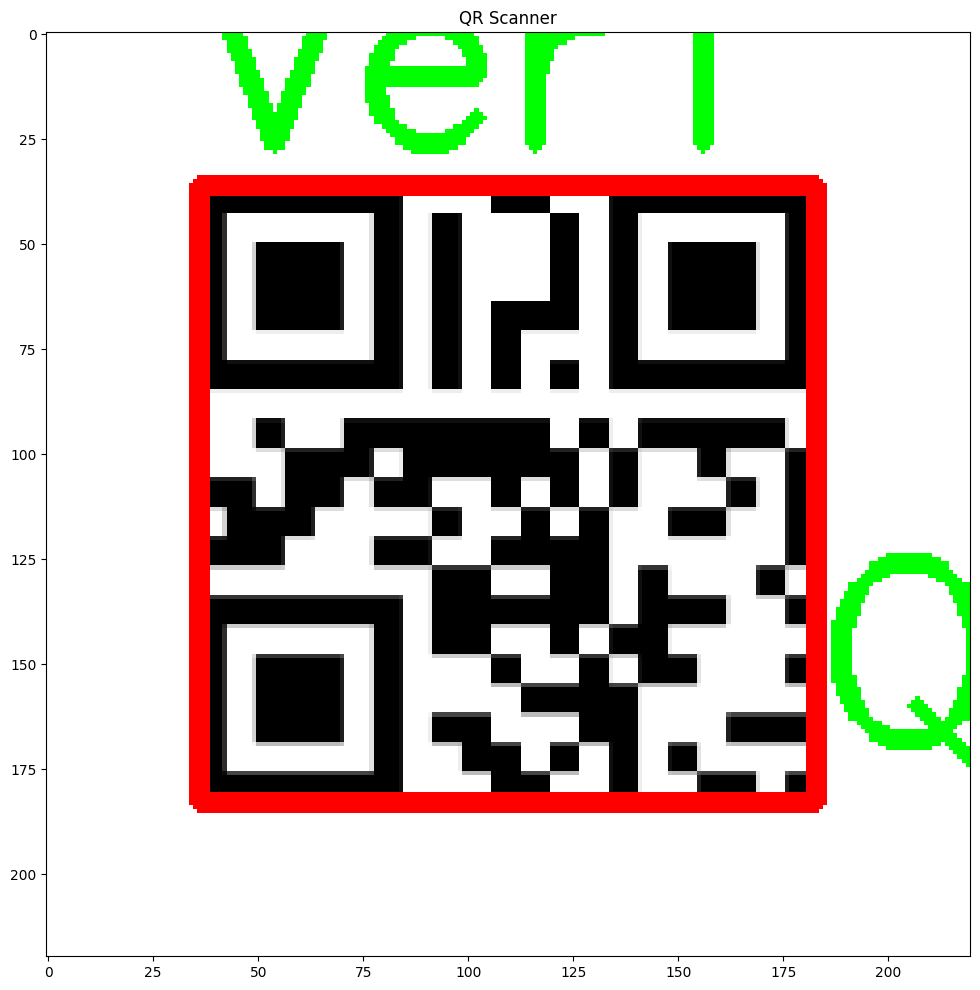

In [16]:
from pyzbar.pyzbar import decode

image = cv2.imread("/content/wiki.png")

# Detect and decode the qrcode
codes = decode(image)

# loop over the detected barcodes
for bc in codes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  print(bc.polygon)
  pt1,pt2,pt3,pt4 = bc.polygon

  # Draw a bounding box over our detected QR code
  pts = np.array( [[pt1.x,pt1.y], [pt2.x,pt2.y], [pt3.x,pt3.y], [pt4.x,pt4.y]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(image, [pts], True, (0,0,255), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("QR Code revealed: {}".format(text))

# display our output
imshow("QR Scanner", image, size = 12)

In [17]:
!wget https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg


--2024-01-15 07:17:15--  https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg
Resolving www.differencebetween.com (www.differencebetween.com)... 172.67.217.144, 104.21.75.79, 2606:4700:3034::ac43:d990, ...
Connecting to www.differencebetween.com (www.differencebetween.com)|172.67.217.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79365 (78K) [image/jpeg]
Saving to: ‘1024px-ISBN.jpg.2’

1024px-ISBN.jpg.2   100%[===================>]  77.50K  --.-KB/s    in 0.008s  

2024-01-15 07:17:15 (9.62 MB/s) - ‘1024px-ISBN.jpg.2’ saved [79365/79365]



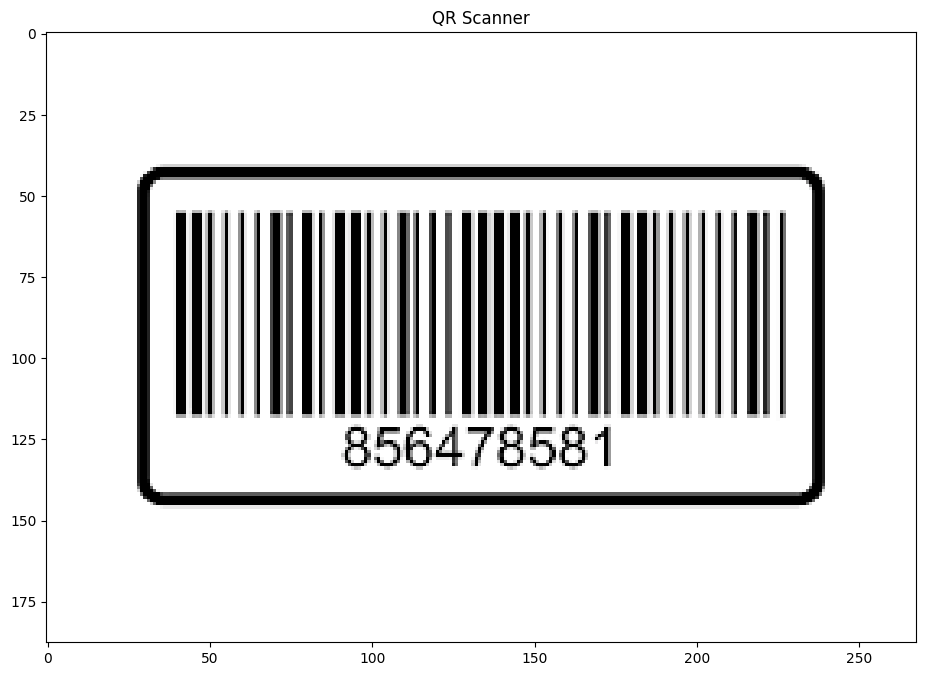

In [19]:
from pyzbar.pyzbar import decode

image = cv2.imread("/content/bar.png")

# Detect and decode the qrcode
barcodes = decode(image)

# loop over the detected barcodes
for bc in barcodes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("Barcode revealed: {}".format(barcode_text))
  print("Barcode revealed: {}".format(barcode_text))

# display our output
imshow("QR Scanner", image, size = 16)